In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations

In [6]:
stations = Stations()
stations = stations.nearby(4.660687, -74.090700)
station = stations.fetch(1)

print(station)

                    name country region    wmo  icao  latitude  longitude  \
id                                                                          
80222  Bogota / Eldorado      CO    CAM  80222  SKBO    4.7167     -74.15   

       elevation        timezone hourly_start hourly_end daily_start  \
id                                                                     
80222     2547.0  America/Bogota   1941-03-01 2024-05-22  1941-03-02   

       daily_end monthly_start monthly_end     distance  
id                                                       
80222 2024-12-30    1941-01-01  2022-01-01  9054.333014  


In [7]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31, 23, 59)

# Get hourly data
data = Hourly('80222', start, end)
data = data.fetch()

data = data['temp']
temps = data.values

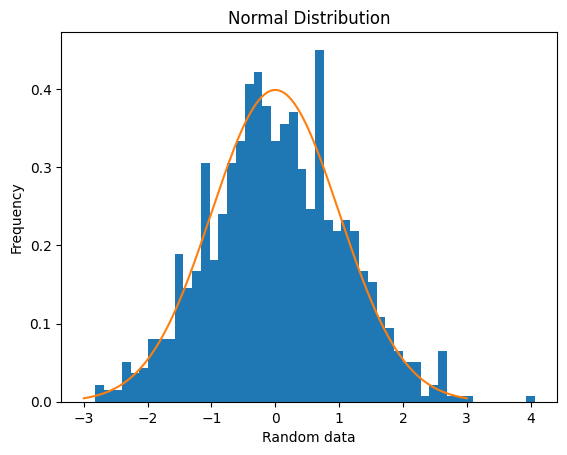

In [2]:
import matplotlib.pyplot as plt
import numpy as np

mean = 0
std = 1
sample_size = 1000

# Generate random data
random_data = np.random.normal(0, 1, sample_size)

plt.hist(random_data, bins=50, density=True)
plt.xlabel('Random data')
plt.ylabel('Frequency')
plt.title('Normal Distribution')

# Generate x values for the normal distribution
x = np.linspace(mean - 3*std, mean + 3*std, sample_size)

# Calculate y values for the normal distribution
y = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std)**2)

# Plot the normal distribution
plt.plot(x, y)
plt.show()


In [8]:
from scipy.stats import chisquare

# Observed frequencies
observed_freq, _ = np.histogram(random_data, bins=50)

# Expected frequencies based on the normal distribution
expected_freq = np.histogram(x, bins=50)[0] * len(random_data)

# Perform the Pearson chi-square test
chi2, p_value = chisquare(observed_freq, expected_freq)

# Check if the distribution is normal
if p_value > 0.05:
    print("The distribution is likely normal.")
else:
    print("The distribution is not likely normal.")


[ 3  2  2  7  5  6 11 11 11 26 20 23 42 25 33 42 46 56 58 52 46 49 51 41
 34 62 32 30 32 30 23 21 15 13  9  7  7  1  3  9  1  1  1  0  0  0  0  0
  0  1] 50
[122  64  46  38  30  28  22  22  20  18  18  16  16  14  14  14  14  12
  14  12  12  10  12  12  12  10  12  10  10  12  10  12  10  12  10  12
  12  10  12  12  14  12  14  14  16  16  20  22  28  66] 50


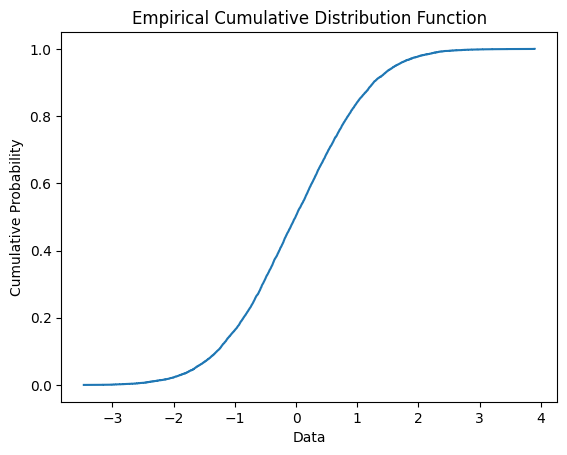

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sort the data in ascending order
sorted_data = np.sort(random_data)

# Calculate the cumulative probabilities
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the ECDF
plt.step(sorted_data, cumulative_prob, where='post')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function')
plt.show()


In [19]:
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import t

# Calculate the Pearson correlation coefficient
def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([xi * yi for xi, yi in zip(x, y)])
    sum_x_squared = sum([xi ** 2 for xi in x])
    sum_y_squared = sum([yi ** 2 for yi in y])

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2)) ** 0.5

    correlation = numerator / denominator
    return correlation

# Calculate the p-value
def p_value(correlation, n):
    t_value = correlation * ((n - 2) / (1 - correlation ** 2)) ** 0.5
    p = 2 * (1 - t.cdf(abs(t_value), n - 2))
    return p

# Calculate the correlation and p-value
correlation = pearson_correlation(sorted_data, sorted(x))
p_value = p_value(correlation, len(sorted_data))

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9789496202655512
p-value: 0.0


In [18]:
from scipy.stats import chisquare

# print(random_data, len(random_data), min(random_data), max(random_data))
# print(x, len(x), min(x), max(x))
# print(type(random_data), type(x))

chi_2, p_val = chisquare(random_data, x)

print(f'Коэффициент хи-квадрат: {chi_2}')
print(f'p-value: {p_val}')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
13505387963831.781